combinedataset and produce 1 common .csv file

In [1]:
import pandas as pd
import os

In [14]:
# Folder where all text files are stored
folder_path = '/workspaces/pythonforDS/data/taxi_log_2008_by_id/'

In [15]:
# Collect data for taxis 1 to 100
taxi_ids = list(range(1, 101))
all_data = []

In [30]:
for taxi_id in taxi_ids:
    file_path = os.path.join(folder_path, f"{taxi_id}.txt")
    # print(file_path)
    if os.path.exists(file_path):
        # print(True)
        with open(file_path, 'r') as file:
            for line in file:
                # print(line)
                parts = line.strip().split(',')
                # print(parts)
                if len(parts) == 4:
                    dummy,timestamp, lon, lat = parts
                    # print(dummy,',',timestamp,',',lon,',',lat)
                    all_data.append([taxi_id, timestamp, float(lon), float(lat)])

len(all_data)

291164

In [31]:
# Convert to DataFrame
df = pd.DataFrame(all_data, columns=['TaxiID', 'Timestamp', 'Longitude', 'Latitude'])

In [ ]:
# Save to CSV
df.to_csv("filtered_100_taxis.csv", index=False)

print("✅ Combined data for 100 taxis saved as filtered_100_taxis.csv")

✅ Combined data for 100 taxis saved as filtered_100_taxis.csv


Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:35957\r\nUs', b'-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.']
Bad pipe message: %s [b'0.0 Safari/537.36 Edg/137.0.0.0\r\nAccept-Encodin']
Bad pipe message: %s [b' gzip, deflate, br, zstd\r\nAccept-Language: en-US,en;q=0.9\r\nCache-Control: max-age=0\r\nReferer: https://']
Bad pipe message: %s [b'thub.com/\r\nX-Request-ID: 9478ce87ae20d7df837a8a40f2be6ac4\r\nX-Real-IP: 122.161.28.82\r\nX-Forwarded-Port:', b'43\r\nX-Forwarded-Scheme: https\r\n']
Bad pipe message: %s [b'Original-URI: /\r\nX-Scheme: https\r\nsec-fetch-site: cross-site\r\nsec-fetch-mode: navigate\r', b'ec-fetch-', b'st: document\r\nsec-ch-ua: "Microsoft Edge";v="137", "Chromium";v="137", "Not/A)Brand";v="24"\r\nsec-ch', b'a-mobile: ?0\r\nsec-ch-ua-platform: "Windows"\r', b'riority: ']
Bad pipe message: %s [b'0.9,image/avif,image/webp,image/a

EDT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("filtered_100_taxis.csv")
print(df.info())
print(df['TaxiID'].nunique())  # Should be 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291164 entries, 0 to 291163
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TaxiID     291164 non-null  int64  
 1   Timestamp  291164 non-null  object 
 2   Longitude  291164 non-null  float64
 3   Latitude   291164 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.9+ MB
None
100


create an interactive map visualizing geographic data

In [4]:
pip install folium


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import folium

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
for _, row in df.sample(500).iterrows():  # sample 500 points to avoid clutter
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=1).add_to(m)

m.save("map.html")

taxi movement based on timestamp data

In [2]:
import pandas as pd
import folium

#load your filtered data
df = pd.read_csv("filtered_100_taxis.csv")

#filter for 1 vehicle
taxi_id = df['TaxiID'].unique()[0]
taxi_df = df[df['TaxiID'] == taxi_id]

#sort by timestamp
taxi_df = taxi_df.sort_values(by="Timestamp")

#get the start point to center the map
start_lat = taxi_df.iloc[0]['Latitude']
start_lon = taxi_df.iloc[0]['Longitude']

#create base map
m = folium.Map(location=[start_lat,start_lon],zoom_start=12)

#Add lines to represent the taxi route
coords = taxi_df[['Latitude','Longitude']].values.tolist()
folium.PolyLine(coords,color="blue",weight=3,opacity = 0.7).add_to(m)

# Optional: add marker for start and end
folium.Marker(location=coords[0], popup="Start", icon=folium.Icon(color="green")).add_to(m)
folium.Marker(location=coords[-1], popup="End", icon=folium.Icon(color="red")).add_to(m)

# Save map
m.save("taxi_movement_map.html")

print("✅ Map saved as 'taxi_movement_map.html'")

✅ Map saved as 'taxi_movement_map.html'


In [7]:
taxi_id = df['TaxiID'].unique()[3]
taxi_df = df[df['TaxiID'] == taxi_id]
taxi_df

,TaxiID,Timestamp,Longitude,Latitude
3633,4,2008-02-02 15:15:04,116.47002,39.90666
3634,4,2008-02-02 15:25:04,116.44422,39.92078
3635,4,2008-02-02 15:35:04,116.43440,39.92296
3636,4,2008-02-02 15:45:03,116.43988,39.92189
3637,4,2008-02-02 15:55:04,116.47187,39.91212
...,...,...,...,...
149882,4,2008-02-08 16:59:03,116.42809,39.92652
149883,4,2008-02-08 17:09:03,116.45324,39.91742
149884,4,2008-02-08 17:19:03,116.48472,39.90474
149885,4,2008-02-08 17:29:03,116.49063,39.90654


In [8]:
# !pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 34.2 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load taxi trip data
df = pd.read_csv("/workspaces/pythonforDS/notebooks/filtered_100_taxis.csv")  # Should have 'latitude', 'longitude'

# Create geometry points
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84

In [5]:
gdf = gdf.to_crs(epsg=3857)  

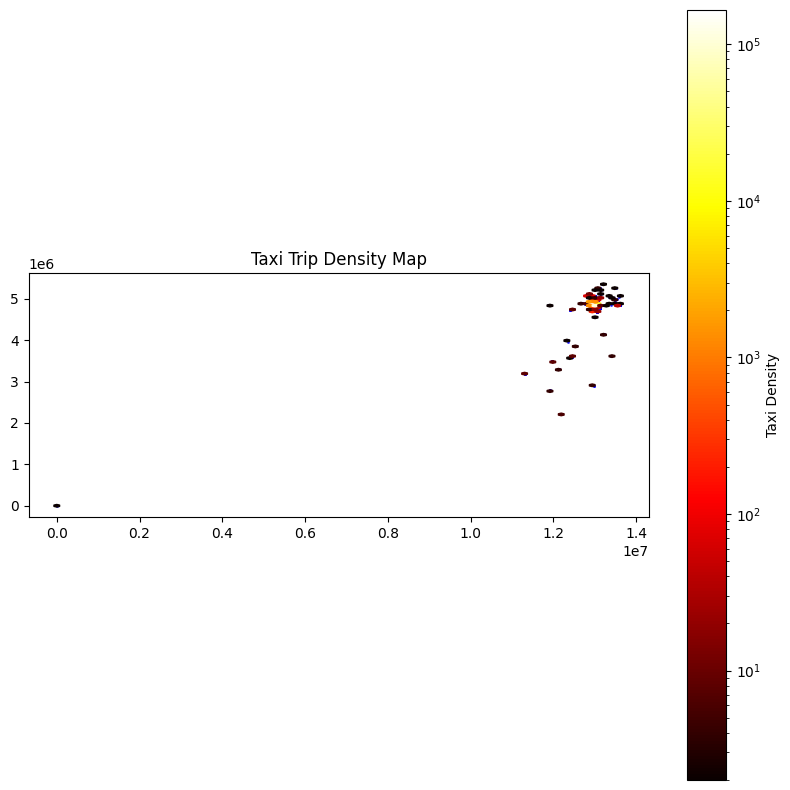

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=1, alpha=0.5, color='blue')

# Use Matplotlib hexbin
plt.hexbin(gdf.geometry.x, gdf.geometry.y, gridsize=100, cmap='hot', bins='log')
plt.colorbar(label='Taxi Density')
plt.title("Taxi Trip Density Map")
plt.show()

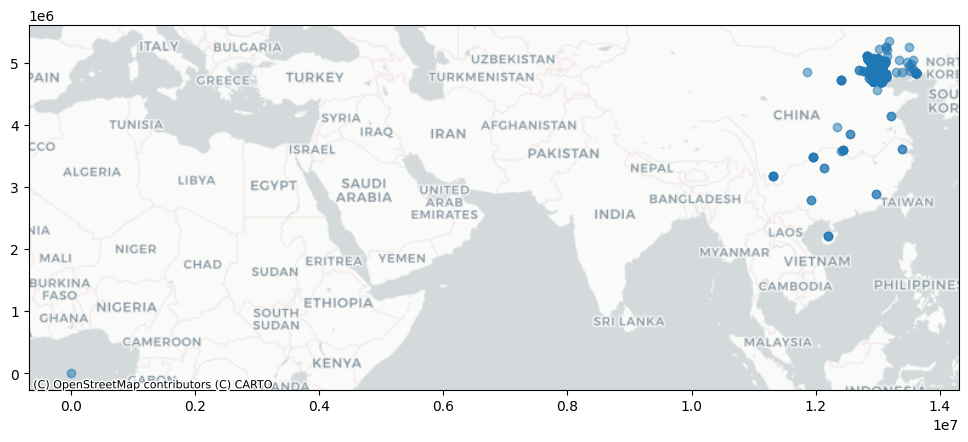

In [9]:
import contextily as ctx  # For basemap tiles

# Spatial join with grid/hex if needed, or use geopandas.sjoin
gdf.plot(alpha=0.3, figsize=(12, 12))
ctx.add_basemap(plt.gca(), source=ctx.providers.CartoDB.Positron)

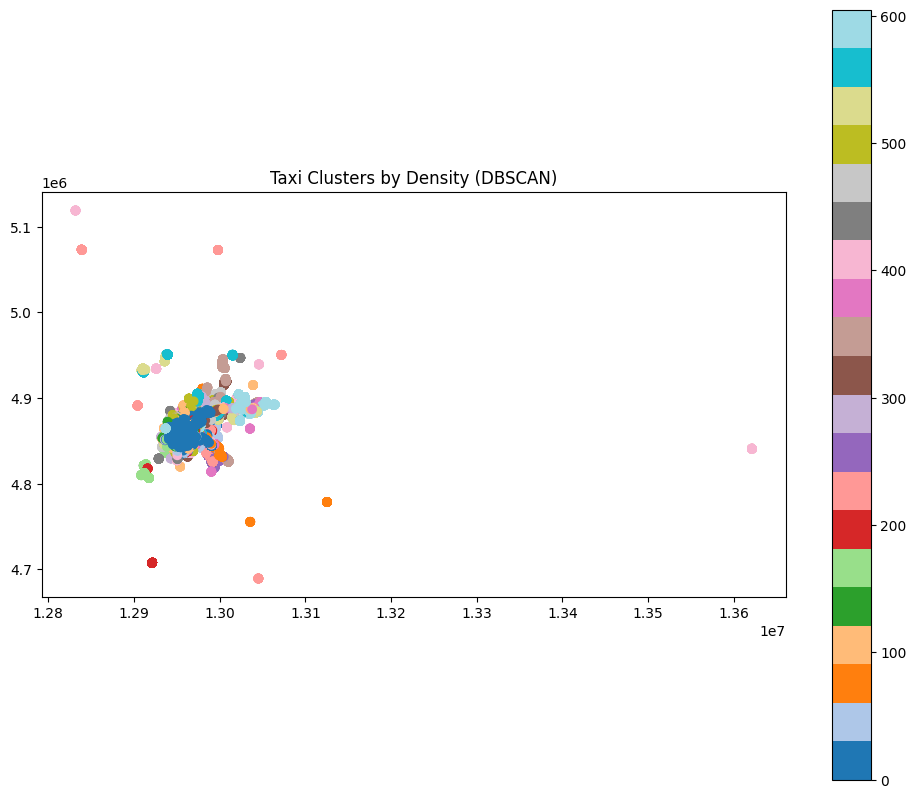

In [10]:
from sklearn.cluster import DBSCAN
import numpy as np

coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))
db = DBSCAN(eps=300, min_samples=10).fit(coords)  # 300 meters radius
gdf['cluster'] = db.labels_

gdf[gdf['cluster'] != -1].plot(column='cluster', cmap='tab20', figsize=(12, 10), legend=True)
plt.title("Taxi Clusters by Density (DBSCAN)")
plt.show()

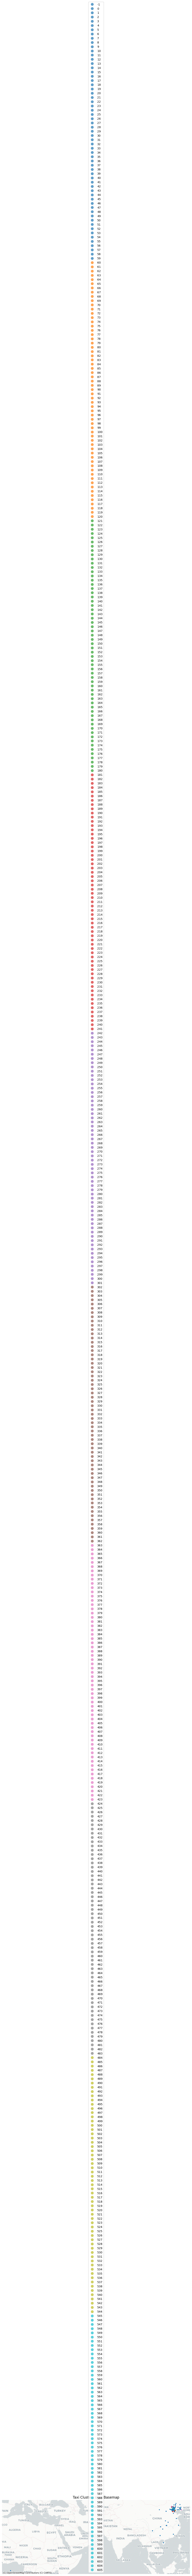

In [11]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Assume your clustered data is in a GeoDataFrame called `gdf`
# and has 'geometry' (Point) and 'cluster' column

# If not in EPSG:3857, convert to Web Mercator
if gdf.crs != "EPSG:3857":
    gdf = gdf.to_crs(epsg=3857)

# Plot with clusters
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, column='cluster', categorical=True, legend=True, markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Taxi Clusters over Basemap")
plt.axis('off')
plt.show()